In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder





In [2]:
dtypes = {
    "duration": np.int8,
    "protocol_type": object,
    "service": object,
    "flag": object,
    "src_bytes": np.int8,
    "dst_bytes": np.int8,
    "land": np.int8,
    "wrong_fragment": np.int8,
    "urgent": np.int8,
    "hot": np.int8,
    "m_failed_logins": np.int8,
    "logged_in": np.int8,
    "num_compromised": np.int8,
    "root_shell": np.int8,
    "su_attempted": np.int8,
    "num_root": np.int8,
    "num_file_creations": np.int8,
    "num_shells": np.int8,
    "num_access_files": np.int8,
    "num_outbound_cmds": np.int8,
    "is_host_login": np.int8,
    "is_guest_login": np.int8,
    "count": np.int8,
    "srv_count": np.int8,
    "serror_rate": np.float16,
    "srv_serror_rate": np.float16,
    "rerror_rate": np.float16,
    "srv_rerror_rate": np.float16,
    "same_srv_rate": np.float16,
    "diff_srv_rate": np.float16,
    "srv_diff_host_rate": np.float16,
    "dst_host_count": np.int8,
    "dst_host_srv_count": np.int8,
    "dst_host_same_srv_rate": np.float16,
    "dst_host_diff_srv_rate": np.float16,
    "dst_host_same_src_port_rate": np.float16,
    "dst_host_srv_diff_host_rate": np.float16,
    "dst_host_serror_rate": np.float16,
    "dst_host_srv_serror_rate": np.float16,
    "dst_host_rerror_rate": np.float16,
    "dst_host_srv_rerror_rate": np.float16,
    "label": object
}

In [3]:
columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","m_failed_logins",
"logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files",
"num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate",
"same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
"dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate",
"dst_host_srv_rerror_rate","label"]

df = pd.read_csv("./archive/kddcup.data.corrected", sep=",", names=columns,  index_col=None)

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,m_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,...,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06
mean,4.834243e+01,1.834621e+03,1.093623e+03,5.716116e-06,6.487792e-04,7.961733e-06,1.243766e-02,3.205108e-05,1.435290e-01,8.088304e-03,...,2.329811e+02,1.892142e+02,7.537132e-01,3.071111e-02,6.050520e-01,6.464107e-03,1.780911e-01,1.778859e-01,5.792780e-02,5.765941e-02
std,7.233298e+02,9.414311e+05,6.450123e+05,2.390833e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506116e-01,3.856481e+00,...,6.402094e+01,1.059128e+02,4.111860e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821774e-01,2.309428e-01,2.309777e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.832900e+04,1.379964e+09,1.309937e+09,1.000000e+00,3.000000e+00,1.400000e+01,7.700000e+01,5.000000e+00,1.000000e+00,7.479000e+03,...,2.550000e+02,2.550000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
#filter out the data to only include data entries that involve an http attack, and drop the service column
df=df[df["service"]=="http"]
df=df.drop("service",axis=1)
columns.remove("service")
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,m_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,SF,215,45076,0,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,SF,162,4528,0,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,SF,236,1228,0,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,SF,233,2032,0,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,SF,239,486,0,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [7]:
df.shape

(623091, 41)

In [8]:
df["label"].value_counts()

label
normal.       619046
back.           2203
neptune.        1801
portsweep.        16
ipsweep.          13
satan.             7
phf.               4
nmap.              1
Name: count, dtype: int64

In [9]:
for col in df.columns:
    if(df[col].dtypes=="object"):
        encoded=LabelEncoder()
        encoded.fit(df[col])
        df[col]=encoded.transform(df[col])

In [10]:
df.head()
df.shape

(623091, 41)

In [11]:
for f in range(0,3):
    df=df.iloc[np.random.permutation(len(df))]

df2=df[:500000]
labels=df2["label"]
df_validate=df[500000:]
x_train,x_test,y_train,y_test=train_test_split(df2,labels,test_size=0.2,random_state=42)
x_val,y_val=df_validate,df_validate["label"]

In [12]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(400000, 41)
(100000, 41)
(123091, 41)


In [13]:
# Isolation Forest model
model=IsolationForest(n_estimators=500,max_samples=256,contamination=0.1,random_state=42)



In [14]:
model.fit(x_train)

IsolationForest(contamination=0.1, max_samples=256, n_estimators=500,
                random_state=42)

### Getting the anomaly scores from the trained isolation forest model and plot a histogram

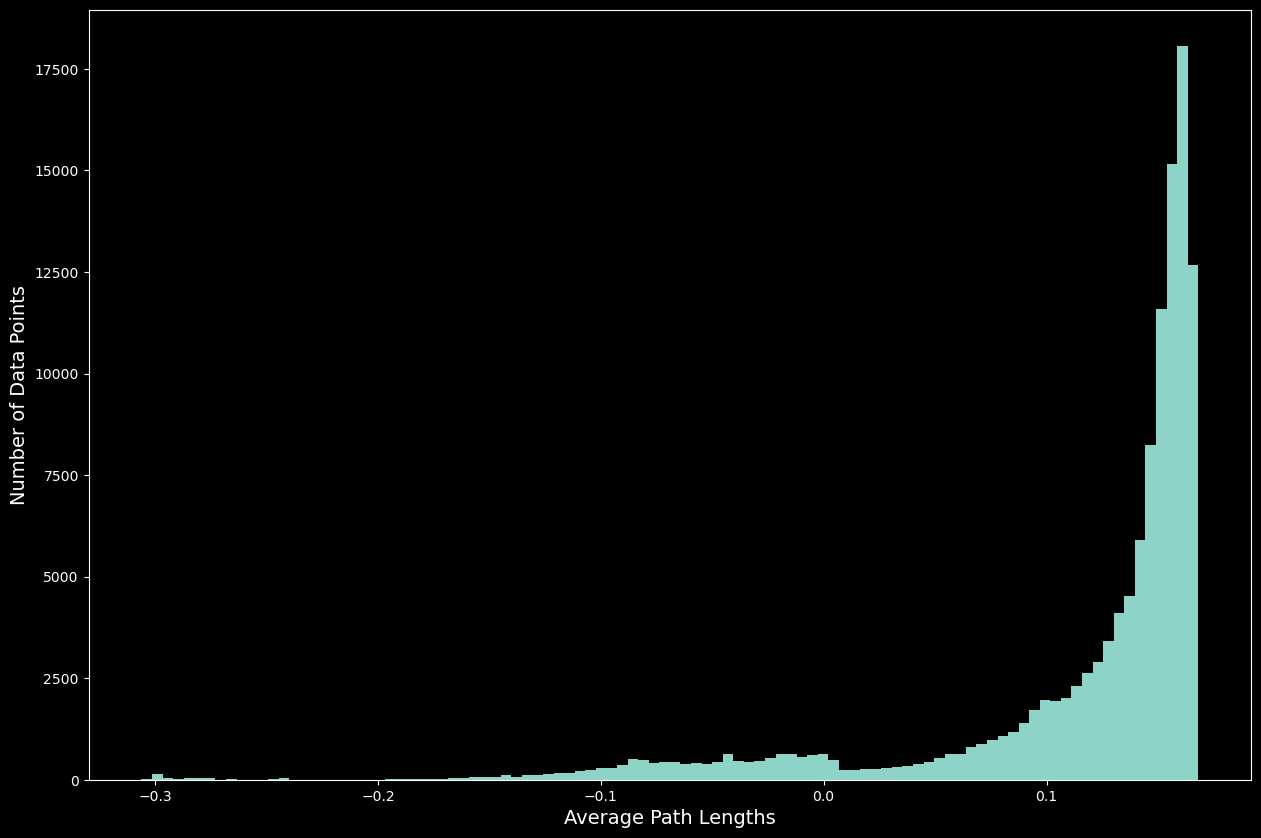

In [15]:
anomaly_scores=model.decision_function(x_val)
plt.figure(figsize=(15,10))
plt.hist(anomaly_scores,bins=100)
plt.xlabel('Average Path Lengths',fontsize=14)
plt.ylabel('Number of Data Points',fontsize=14)
plt.show()

In [16]:
from sklearn.metrics import roc_auc_score
anomalies=anomaly_scores>-0.19
matches=y_val==list(encoded.classes_).index("normal.")
auc=roc_auc_score(anomalies,matches)
print("AUC: {:.2%}".format(auc))

AUC: 95.96%


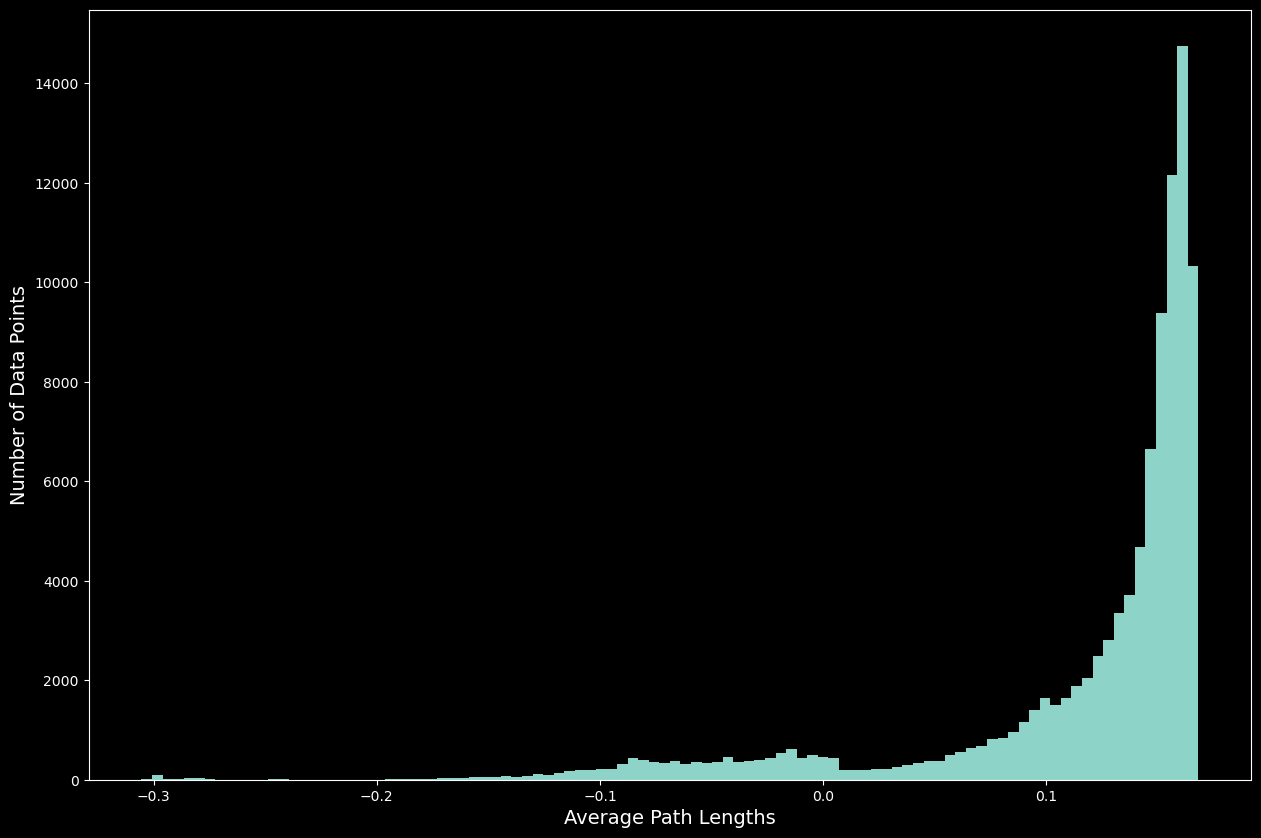

In [17]:
anomaly_scores_test=model.decision_function(x_test)
plt.figure(figsize=(15,10))
plt.hist(anomaly_scores_test,bins=100)
plt.xlabel('Average Path Lengths',fontsize=14)
plt.ylabel('Number of Data Points',fontsize=14)
plt.show()

In [18]:
from sklearn.metrics import roc_auc_score
anomalies=anomaly_scores_test>-0.19
matches=y_test==list(encoded.classes_).index("normal.")
auc=roc_auc_score(anomalies,matches)
print("AUC: {:.2%}".format(auc))

AUC: 96.25%
